# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'E:/alex/disco duro viejo/Desarrollo profesional/Python/DS4B/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [5]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660728,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.09,0.30,0.10,0.70,0.44,0
660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.04,0.50,0.67,0
660681,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.63,0.04,0.70,0.78,1
660673,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.04,0.72,0.08,0.60,1.00,1
660664,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.70,0.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.24,0.62,0.11,0.60,0.56,1
579615,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.09,0.09,0.10,0.60,1.00,1
579546,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.04,0.10,0.08,0.60,0.89,0


Después de hacer varias iteraciones dejando y sacando variables, borramos variables para dejar las que mejor resultado nos ha dado

In [6]:
df.drop(columns = ['fuente_Chat',
                  'fuente_Direct Traffic',
                  'fuente_Google',
                  'fuente_OTROS',
                  'fuente_Organic Search',
                  'fuente_Reference',
                  'score_actividad_mms',
                  'score_perfil_mms',
                  'ambito_Banking, Investment And Insurance',
                  'ambito_OTROS',
                  'ambito_Operations Management',
                  'ambito_Select',
                  'ambito_Business Administration',
                  'ambito_Finance Management',
                  'ambito_Healthcare Management',
                  'ambito_Human Resource Management',
                  'ambito_IT Projects Management',
                  'ambito_International Business',
                  'ambito_Marketing Management',
                  'ambito_Media and Advertising',
                  'ambito_Supply Chain Management',
                  'ambito_Travel and Tourism',
                  'descarga_lm_No',
                  'descarga_lm_Yes',
                  'visitas_total_mms',
                  'paginas_vistas_visita_mms'], inplace = True)

## MODELIZAR

### Crear el espacio de soluciones

Establecemos el espacio de soluciones entre 3 y 7 segmentos

In [7]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [8]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [9]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [10]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,5208.22,0.29,1419.37,1.48
4,4565.71,0.31,1304.57,1.35
5,4089.48,0.33,1232.00,1.38
6,3726.41,0.37,1175.00,1.59


#### Analizar los gráficos

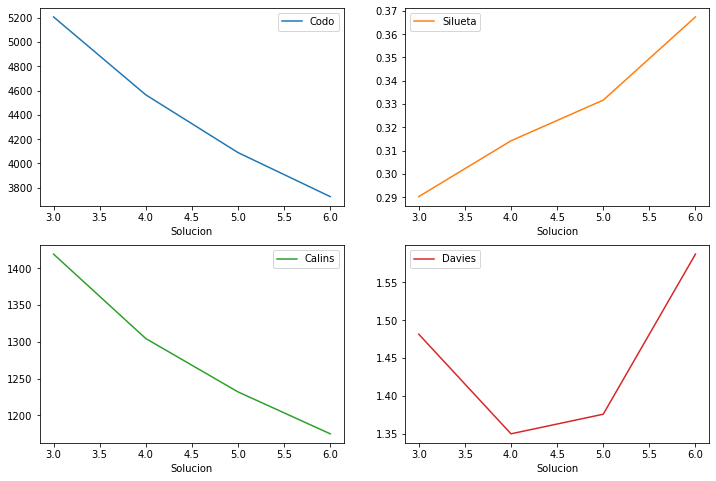

In [11]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

Los gráficos de las principales métricas no nos dicen nada claro. 
* En el método del codo no se ve un salto claro, quizá podría ser 4. 
* Con silueta debería ser 6
* Calins 3
* Davies 4

Debido a que nuestro dataset no tiene muchos datos y que estamos usando bastantes variables, el espacio dimensional está muy disperso y la solución es inestable. 
No obstante tras realizar una serie de pruebas creemos que con 6 segmentos llegamos a una solución aceptable donde podemos extraer varios insishts.

### Segmentación final con la mejor solucion

In [12]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento 

In [13]:
df['segmento'] = cluster.predict(df)

## PERFILAR LOS SEGMENTOS

In [14]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,0.998869,0.000000,0.000000,0.881239,0.000000,0.223278
origen_Landing Page Submission,0.000000,1.000000,0.949640,0.000000,0.907801,0.584323
origen_Lead Add Form,0.001131,0.000000,0.038027,0.091222,0.073759,0.187648
origen_OTROS,0.000000,0.000000,0.012333,0.027539,0.018440,0.004751
ult_actividad_Chat Conversation,0.237557,0.000000,0.000000,0.000000,0.066667,0.016627
ult_actividad_Converted to Lead,0.119910,0.000000,0.000000,0.000000,0.249645,0.026128
ult_actividad_Email Link Clicked,0.064480,0.000000,0.000000,0.000000,0.114894,0.030879
ult_actividad_Email Opened,0.000000,1.000000,0.000000,1.000000,0.000000,0.361045
ult_actividad_OTROS,0.055430,0.000000,0.000000,0.000000,0.222695,0.076010
ult_actividad_Page Visited on Website,0.118778,0.000000,0.000000,0.000000,0.346099,0.040380


In [15]:
df.segmento.value_counts(normalize = True)

1   0.26
2   0.20
0   0.18
4   0.15
3   0.12
5   0.09
Name: segmento, dtype: float64

## Conclusiones

En este caso deberíamos esperar a obtener un dataset con más registros donde el problema del espacio dimensional se minimizara al estar más poblado. De esa manera el algoritmo sería menos sensible al ruido y captaría mejor la estructura de los datos. En cualquier caso tras perfilar los segmentos podríamos decir que:

* El chat lo eliminaríamos porque no genera ningún impacto en los leads
* El SMS está funcionando bastante bien (segmentos 2 y 5)
* El email lo mantenemos para aquellos que sean profesionales en activo. 
* Priorizar sobre los leads del segmento 5.
* Los segmentos que convierten representan un 29% de los leads
* Los segmentos que no convierten prácticamente nada y que se pueden dejar de gestionar representan un 41%